## Decision Tree 

1.Module and Environment set up
2.Import Libraries
3.Import Dataset and understanding
4.Missing value treatment
5.Feature Transformation
6.Feature Selection
7.Define X and Y
8.Train the model
9.Predict the test set result 
10.Evaluate the model

Team Avenger

In [5]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [6]:
# Import Libraries required for the experiment
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer,MinMaxScaler,RobustScaler,StandardScaler
import random
import os
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
import collections
np.random.seed(132)

In [7]:
# Initiate Encoders which will be used for Categorical Variables
label_encoder = LabelEncoder()

# Prints all line without skipping
pd.set_option('display.max_rows', None)
# Prints all columns without skipping
pd.set_option('display.max_columns', None)

In [8]:
os.getcwd()

'C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Decision Tree Assignment'

In [9]:
bookings=pd.read_csv(r'C:\Users\chethan mk\Downloads\AI&ML Training\Decision Tree Assignment\hotel_bookings.csv - hotel_bookings.csv.csv')
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,03-07-2015


In [10]:
#allows us to learn the shape of object types of our data
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
## Used for calculating some statistcal data like percentile,mean and some standard of numerical values of thw series or data frame
bookings.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,21-10-2015
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN


In [12]:
bookings.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type            

In [13]:
#Assign Temporary Storage of the core dataset (For larger sets this step must be avoided)
temp = bookings.copy()

In [14]:
temp.columns[[3,5,6,13,22,23,29]]

Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'country', 'agent', 'company',
       'reservation_status_date'],
      dtype='object')

In [15]:
temp=temp.drop(temp.columns[[3,5,6,13,22,23,29]],axis=1)


In [16]:
print(bookings.shape)
print(temp.shape)

(119390, 30)
(119390, 23)


Team Avenger

## Missing value Treatment

In [17]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]

# Identify Categorical Variables manually
temp1=temp.head()
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]] = temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].astype(str)

C:\Users\chethan mk\anaconda3\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [18]:
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,customer_type,required_car_parking_spaces
0,Resort Hotel,0,July,0,0,Direct,Direct,0,0,3,No Deposit,Transient,0
1,Resort Hotel,0,July,0,0,Direct,Direct,0,0,4,No Deposit,Transient,0
2,Resort Hotel,0,July,0,1,Direct,Direct,0,0,0,No Deposit,Transient,0
3,Resort Hotel,0,July,0,1,Corporate,Corporate,0,0,0,No Deposit,Transient,0
4,Resort Hotel,0,July,0,2,Online TA,TA/TO,0,0,0,No Deposit,Transient,0


In [19]:
print(null_columns)

Index(['children'], dtype='object')


In [20]:
temp.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [21]:
categoric_variables = temp1.columns[temp1.dtypes=='object']

# Categorical Imputation
for i in range(0,len(categoric_variables)):
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(np.nan,temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="NaN", value = temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="nan", value = temp[categoric_variables[i]].mode()[0])

    # Numeric Imputation
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy="mean")

# Mean Imputation for Numeric Variables
numeric_variables = set(temp.columns) - set(categoric_variables)
i=1
for i in range(0,len(numeric_variables)):
    if(temp.columns[i] in numeric_variables):
       temp.iloc[:,[i]] = mean_imp.fit_transform(temp.iloc[:,[i]])
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="NaN",value =0)
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="nan",value =0)
       temp[temp.columns[i]].fillna(0, inplace = True) 

In [22]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]
null_columns

Index([], dtype='object')

In [23]:
# Converting into string
temp['hotel'] = temp['hotel'].astype(str)
temp['arrival_date_month'] = temp['arrival_date_month'].astype(str)
temp['meal'] = temp['meal'].astype(str)
temp['market_segment'] = temp['market_segment'].astype(str)
temp['distribution_channel'] = temp['distribution_channel'].astype(str)
   
temp['is_repeated_guest'] = temp['is_repeated_guest'].astype(str)
temp['reserved_room_type'] = temp['reserved_room_type'].astype(str)
temp['deposit_type'] = temp['deposit_type'].astype(str)
temp['customer_type'] = temp['customer_type'].astype(str)
temp['is_canceled'] = temp['is_canceled'].astype(str)


In [24]:
num_data = temp[temp.columns[temp.dtypes!='object']]
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342.0,0,0,2.0,0.0,0,0,0,3,0,0.0,0,0
1,737.0,0,0,2.0,0.0,0,0,0,4,0,0.0,0,0
2,7.0,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
3,13.0,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
4,14.0,0,2,2.0,0.0,0,0,0,0,0,98.0,0,1


In [25]:
# Plotting All the Variables that are available in raw file
os.chdir('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Decision Tree Assignment\\')
if not os.path.exists('Plots'):
    os.makedirs('Plots')
os.chdir('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Decision Tree Assignment\\Plots\\')


lead_time


C:\Users\chethan mk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


stays_in_weekend_nights
stays_in_week_nights


C:\Users\chethan mk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


adults
children
babies
previous_cancellations
previous_bookings_not_canceled


C:\Users\chethan mk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-26-a677724f96ab>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


booking_changes


C:\Users\chethan mk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


days_in_waiting_list


C:\Users\chethan mk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


adr
required_car_parking_spaces


C:\Users\chethan mk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


total_of_special_requests


<Figure size 432x288 with 0 Axes>

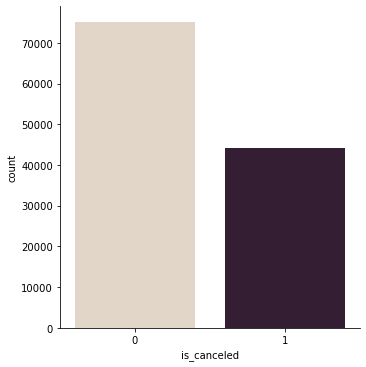

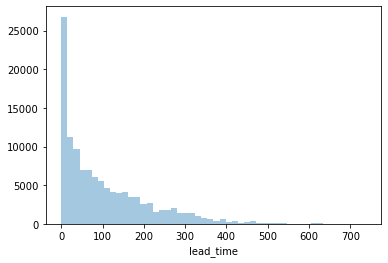

<Figure size 432x288 with 0 Axes>

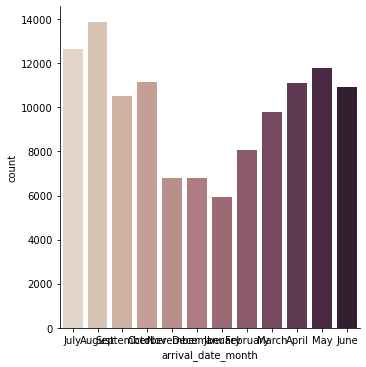

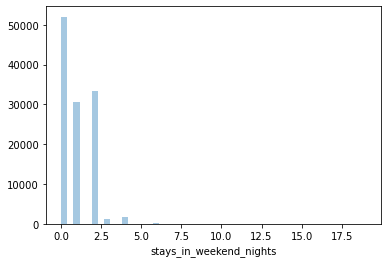

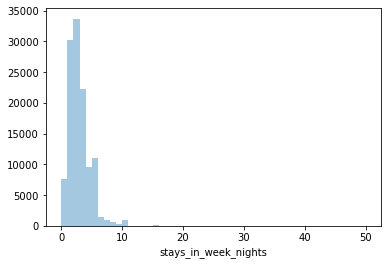

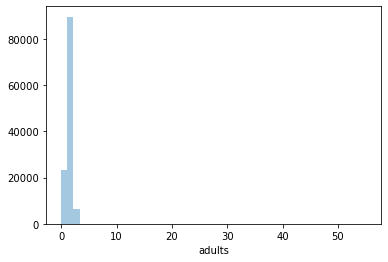

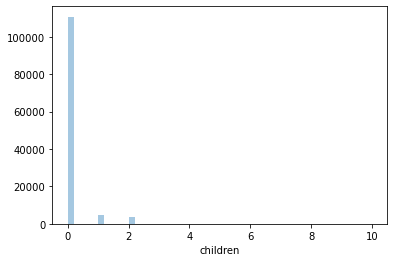

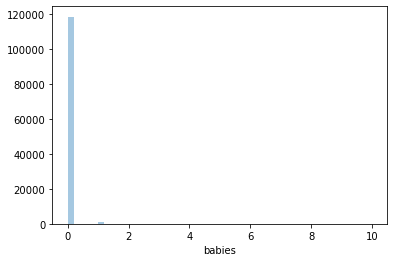

<Figure size 432x288 with 0 Axes>

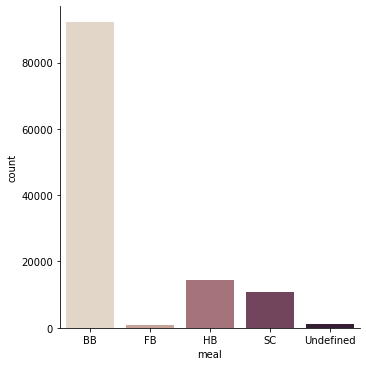

<Figure size 432x288 with 0 Axes>

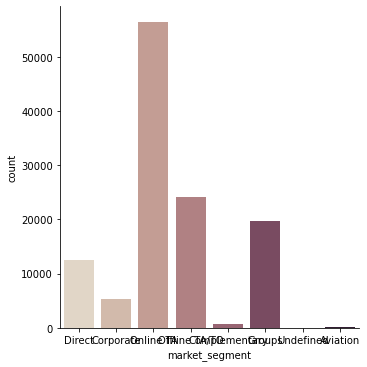

<Figure size 432x288 with 0 Axes>

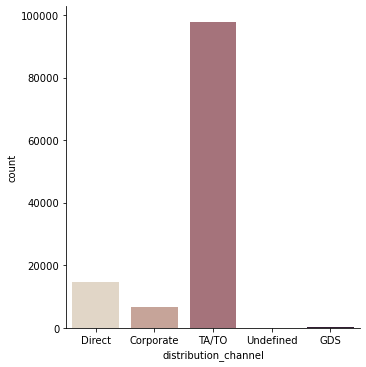

<Figure size 432x288 with 0 Axes>

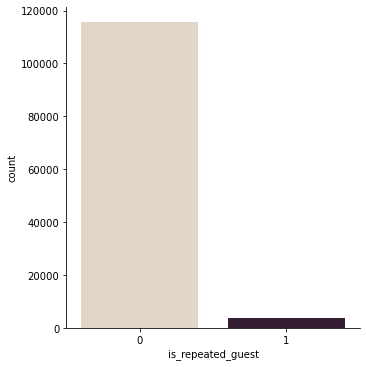

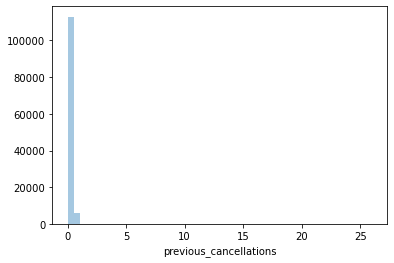

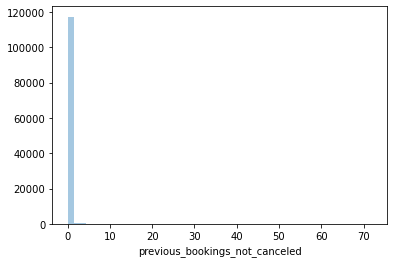

<Figure size 432x288 with 0 Axes>

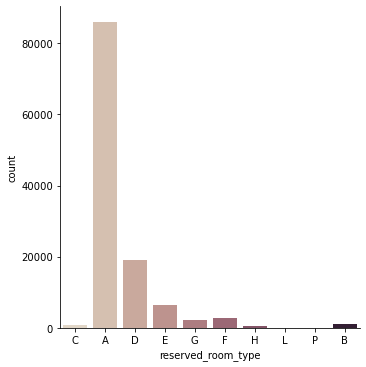

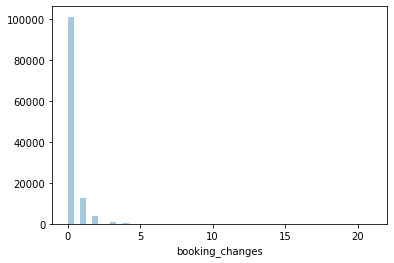

<Figure size 432x288 with 0 Axes>

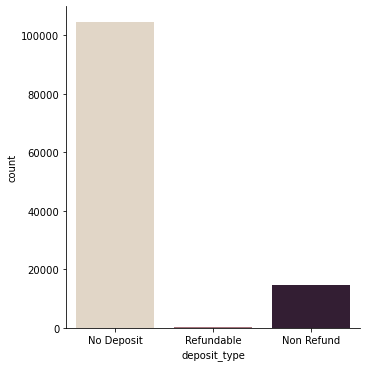

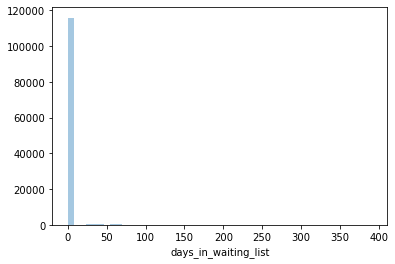

<Figure size 432x288 with 0 Axes>

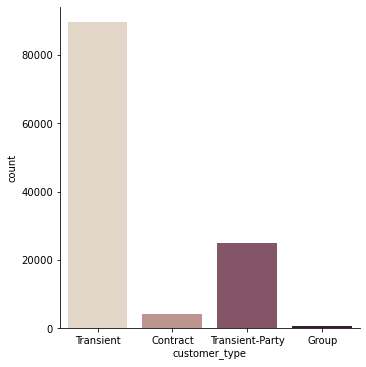

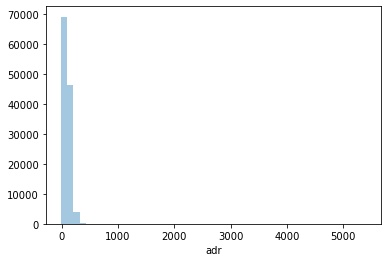

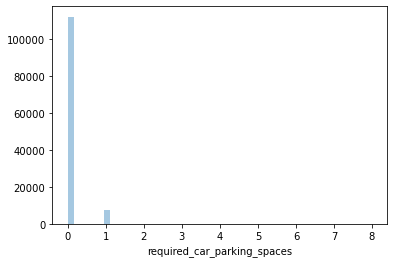

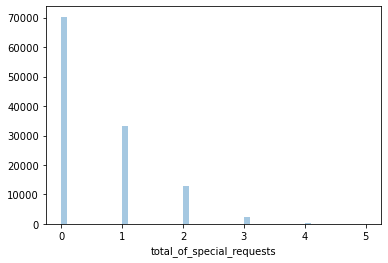

In [26]:
for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        print(temp.columns[i])
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')
    else:
        plt.figure()
        sns_plot = sns.catplot(x=temp.columns[i], kind="count", palette="ch:.25", data=temp)
        sns_plot.savefig(temp.columns[i]+'.png')

In [27]:
# Plotting All the Transformed Variables 
os.chdir('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Decision Tree Assignment\\')
if not os.path.exists('Transformed Plots'):
    os.makedirs('Transformed Plots')
os.chdir('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Decision Tree Assignment\\Transformed Plots\\')

C:\Users\chethan mk\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\chethan mk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


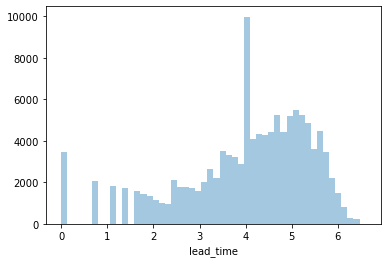

In [28]:
# Log transformation with mean Imputation for Non-Uniform Variables
log_mean_transform_var=['lead_time']


import time
for i in range(0,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        logtransform=np.log(temp[temp.columns[i]])
        logtransform = logtransform.replace([np.inf, -np.inf], np.nan)
        logtransform = mean_imp.fit_transform(pd.DataFrame(logtransform))
        temp[temp.columns[i]]=logtransform
        temp[temp.columns[i]].fillna(0, inplace = True) 

for i in range(1,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')

## Feature Selection

In [29]:
numeric_variables = num_data.columns
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [30]:
temp.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,3.994735,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,1.429553,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,3.295837,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,4.234107,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,5.075174,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,6.602588,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [31]:
# Create correlation matrix
corr_matrix = temp[numeric_variables].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7 & less than -0.7
to_drop_pos = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_neg = [column for column in upper.columns if any(upper[column] < -0.7)]
print(to_drop_neg)
print(to_drop_pos)

[]
[]


<ipython-input-31-f39f320fd897>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<ipython-input-32-421f93520688>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


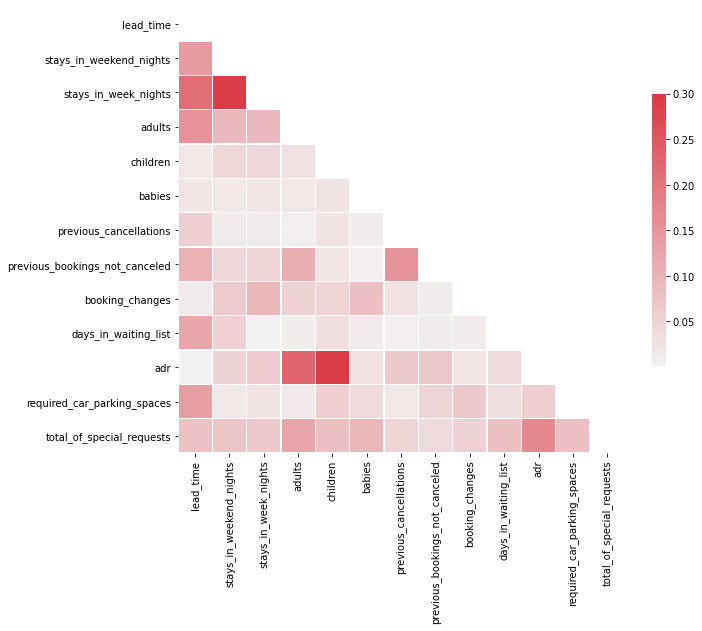

In [32]:
plt.figure(figsize=(10,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns_plot=sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns_plot.figure.savefig('correlation.png')
# Fill na values with Numeric value as 0
for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        temp[temp.columns[i]].fillna(0, inplace = True) 


In [33]:
# Drop NaN Value from the temp variable
        
temp=temp.dropna(how='any') 

X = temp.drop(temp.columns[1],axis=1)
y = temp[temp.columns[1]]
y =np.where(y =='0',0,1)
# Identify Numeric Values separately
#num_only=set(numeric_variables).difference(categoric_variables)

In [34]:
temp['is_canceled'].unique()

array(['0', '1'], dtype=object)

In [35]:
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [36]:
# Decision tree with gini 
dt_model_num = DecisionTreeClassifier() 
  
# Performing training 
dt_model_num.fit(X[numeric_variables], y)

DecisionTreeClassifier()

In [37]:
print(dt_model_num.feature_importances_)

[0.31367332 0.04471375 0.08414101 0.02885147 0.01357317 0.00155329
 0.07697467 0.01710161 0.04256907 0.01162742 0.27610777 0.02290301
 0.06621045]


In [38]:
dt_p_values_num = pd.Series(dt_model_num.feature_importances_,index = X[numeric_variables].columns)
dt_p_values_num.sort_values(ascending = False , inplace = True)
dt_p_values_num

lead_time                         0.313673
adr                               0.276108
stays_in_week_nights              0.084141
previous_cancellations            0.076975
total_of_special_requests         0.066210
stays_in_weekend_nights           0.044714
booking_changes                   0.042569
adults                            0.028851
required_car_parking_spaces       0.022903
previous_bookings_not_canceled    0.017102
children                          0.013573
days_in_waiting_list              0.011627
babies                            0.001553
dtype: float64

C:\Users\chethan mk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


{'babies'}


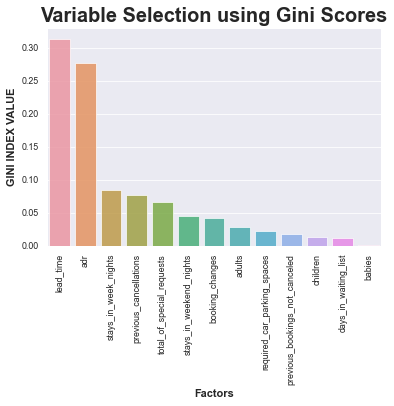

In [39]:

plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(dt_p_values_num.index[dt_p_values_num>0],dt_p_values_num[dt_p_values_num>0],alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 11, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 11, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX'+'.png')

dt_selected_num=dt_p_values_num.index[dt_p_values_num>0.01]
dt_rejected_num=set(X[numeric_variables].columns.values).difference(dt_selected_num)
print(dt_rejected_num)

## Categorical Feature Selection

[0.02314125 0.05537241 0.01927682 0.11778814 0.02412427 0.01020358
 0.02835215 0.67796517 0.04377621]


C:\Users\chethan mk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Index([], dtype='object')


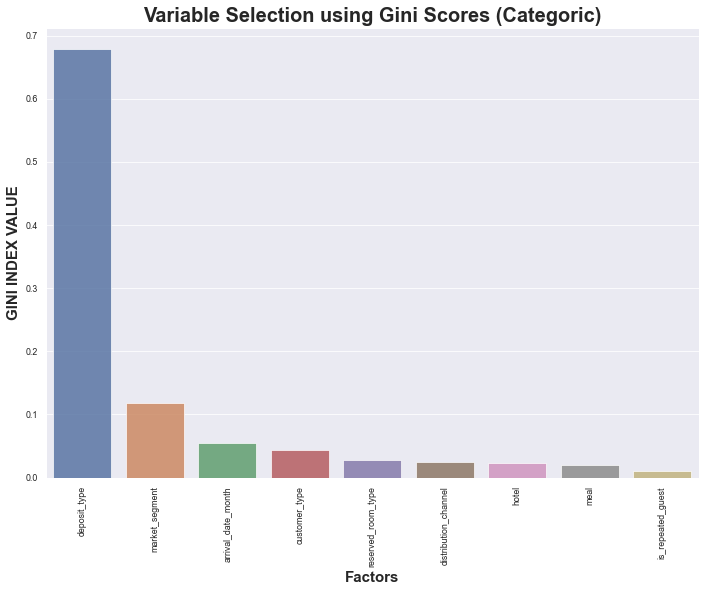

In [40]:
#temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]] = temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]].astype('str')

# Selecting Categorical Variables alone for Variable Selection
t=temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]]
# Dropping off NaN Values if Any
t=t.dropna(how='any')
del t['is_canceled']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(0,len(t.columns)):
    t.iloc[:,i] = le.fit_transform(t.iloc[:,i])
# Using GINI to decide Variables for Categoric Variables

dt_model_cat = DecisionTreeClassifier()
dt_model_cat.fit(t, y) 
print(dt_model_cat.feature_importances_)
dt_p_values_cat = pd.Series(dt_model_cat.feature_importances_,index = t.columns)
dt_p_values_cat.sort_values(ascending = False , inplace = True)
dt_p_values_cat.index
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(dt_p_values_cat.index,dt_p_values_cat,alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 15, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores (Categoric)", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX_Categoric'+'.png')

dt_selected_cat=dt_p_values_cat.index[dt_p_values_cat>0.0]
dt_rejected_cat=dt_p_values_cat.index[dt_p_values_cat==0]


print(dt_rejected_cat)

In [41]:
rejected_variables=[]
rejected_variables.extend(to_drop_pos)
rejected_variables.extend(to_drop_neg)
rejected_variables.extend(dt_rejected_num)
rejected_variables.extend(dt_rejected_cat)


In [42]:
rejected_variables

['babies']

In [43]:
print(set(temp.columns).difference(rejected_variables))

final_selection=set(temp.columns).difference(rejected_variables)
final_selection.remove('is_canceled')

#cat_vars=set(set(final_selection).difference(rejected_variables_filter)).difference(numeric_variables)
#cat_vars1=cat_vars
#final_selection=set(final_selection).difference(cat_vars1)


{'hotel', 'is_canceled', 'previous_cancellations', 'reserved_room_type', 'is_repeated_guest', 'required_car_parking_spaces', 'stays_in_weekend_nights', 'market_segment', 'lead_time', 'days_in_waiting_list', 'booking_changes', 'adr', 'deposit_type', 'previous_bookings_not_canceled', 'meal', 'total_of_special_requests', 'arrival_date_month', 'customer_type', 'stays_in_week_nights', 'distribution_channel', 'adults', 'children'}


In [44]:
temp[final_selection].head()

,hotel,previous_cancellations,reserved_room_type,is_repeated_guest,required_car_parking_spaces,stays_in_weekend_nights,market_segment,lead_time,days_in_waiting_list,booking_changes,adr,deposit_type,previous_bookings_not_canceled,meal,total_of_special_requests,arrival_date_month,customer_type,stays_in_week_nights,distribution_channel,adults,children
0,Resort Hotel,0,C,0,0,0,Direct,5.834811,0,3,0.0,No Deposit,0,BB,0,July,Transient,0,Direct,2.0,0.0
1,Resort Hotel,0,C,0,0,0,Direct,6.602588,0,4,0.0,No Deposit,0,BB,0,July,Transient,0,Direct,2.0,0.0
2,Resort Hotel,0,A,0,0,0,Direct,1.945910,0,0,75.0,No Deposit,0,BB,0,July,Transient,1,Direct,1.0,0.0
3,Resort Hotel,0,A,0,0,0,Corporate,2.564949,0,0,75.0,No Deposit,0,BB,0,July,Transient,1,Corporate,1.0,0.0
4,Resort Hotel,0,A,0,0,0,Online TA,2.639057,0,0,98.0,No Deposit,0,BB,1,July,Transient,2,TA/TO,2.0,0.0


In [45]:
temp[final_selection].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   previous_cancellations          119390 non-null  int64  
 2   reserved_room_type              119390 non-null  object 
 3   is_repeated_guest               119390 non-null  object 
 4   required_car_parking_spaces     119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   market_segment                  119390 non-null  object 
 7   lead_time                       119390 non-null  float64
 8   days_in_waiting_list            119390 non-null  int64  
 9   booking_changes                 119390 non-null  int64  
 10  adr                             119390 non-null  float64
 11  deposit_type                    119390 non-null  object 
 12  previous_booking

## One hot Encoding

In [46]:
num_data = temp[temp.columns[temp.dtypes!='object']]
cat_data = temp[temp.columns[temp.dtypes=='object']]
del cat_data['is_canceled']

In [47]:
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,5.834811,0,0,2.0,0.0,0,0,0,3,0,0.0,0,0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0,0.0,0,0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0,98.0,0,1


In [48]:
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,Direct,Direct,0,C,No Deposit,Transient
1,Resort Hotel,July,BB,Direct,Direct,0,C,No Deposit,Transient
2,Resort Hotel,July,BB,Direct,Direct,0,A,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,Corporate,0,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,TA/TO,0,A,No Deposit,Transient


In [49]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)
dummydata = enc.fit_transform(cat_data)
dummydata = pd.DataFrame(dummydata)
names = enc.get_feature_names(input_features=list(cat_data.columns))
dummydata.columns = names
dummydata.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
dummydata=dummydata.reset_index(drop=True)
num_data=num_data.reset_index(drop=True)
X_log=pd.concat([num_data,dummydata], axis=1)


In [51]:
X_log.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,5.834811,0,0,2.0,0.0,0,0,0,3,0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0,98.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Decision Tree1

In [52]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.33, random_state=RANDOM_SEED)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)
# Fit the random search model
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [53]:
#Predict the response for train dataset
y_pred_train = clf.predict(X_train)
#Predict the response for test dataset
y_pred_test= clf.predict(X_test)


In [54]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

print( "confusion_matrix train data\n\n",confusion_matrix_train,"\n")


confusion_matrix train data

 [[45839  4642]
 [11532 17978]] 



In [55]:
print( "Classification report train data\n\n" ,classification_report(y_train, y_pred_train))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.80      0.91      0.85     50481
           1       0.79      0.61      0.69     29510

    accuracy                           0.80     79991
   macro avg       0.80      0.76      0.77     79991
weighted avg       0.80      0.80      0.79     79991



In [56]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "confusion_matrix train data\n\n",confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('true negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)


confusion_matrix train data

 [[22448  2237]
 [ 5733  8981]] 

true negative 22448
false positive 2237
false negative 5733
true positive 8981


In [57]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.80      0.91      0.85     24685
           1       0.80      0.61      0.69     14714

    accuracy                           0.80     39399
   macro avg       0.80      0.76      0.77     39399
weighted avg       0.80      0.80      0.79     39399



## Decision Tree2

In [58]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.33, random_state=RANDOM_SEED)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)
# Fit the random search model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [59]:
#Predict the response for train dataset
y_pred_train = clf.predict(X_train)
#Predict the response for test dataset
y_pred_test= clf.predict(X_test)


In [60]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

print( "confusion_matrix train data\n\n",confusion_matrix_train,"\n")


confusion_matrix train data

 [[47001  3480]
 [10650 18860]] 



In [61]:
print( "Classification report train data\n\n" ,classification_report(y_train, y_pred_train))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.82      0.93      0.87     50481
           1       0.84      0.64      0.73     29510

    accuracy                           0.82     79991
   macro avg       0.83      0.79      0.80     79991
weighted avg       0.83      0.82      0.82     79991



In [62]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "confusion_matrix train data\n\n",confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('true negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)


confusion_matrix train data

 [[22957  1728]
 [ 5370  9344]] 

true negative 22957
false positive 1728
false negative 5370
true positive 9344


In [63]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.81      0.93      0.87     24685
           1       0.84      0.64      0.72     14714

    accuracy                           0.82     39399
   macro avg       0.83      0.78      0.80     39399
weighted avg       0.82      0.82      0.81     39399



### The accuracy of the decision tree is increased when max_depth is increased from 5 to 10

## Decision Tree More than 1

In [64]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.33, random_state=RANDOM_SEED)


In [65]:
# Let's first try a simple model to make a benchmark for our model performance
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
scoring = ['precision_macro','recall_macro','accuracy']
depth1 = pd.DataFrame(columns = ['test_accuracy','test_precision_macro','test_recall_macro','Max_depth','criterion','min_samples_split'])
max_depth = [10,15,25,50]
criterion= ['gini','entropy']
min_samples_split=[2,3,4,5,7] 
max_features=["auto", "sqrt", "log2"]
max_leaf_nodes = [None,1,2,3,4,5,6,7,8,9,10]
for k in criterion:
    for j in min_samples_split:
        for i in max_depth:
            for l in max_leaf_nodes:
                for m in max_features:
                    clf = DecisionTreeClassifier(criterion =k, max_depth = i,min_samples_split = j,max_leaf_nodes=l,max_features=m,random_state=0)
            scores = cross_validate(estimator = clf,X=X_train, y=y_train,cv=3,scoring=scoring)
            a = pd.DataFrame(scores)
            a = a[['test_accuracy','test_precision_macro','test_recall_macro']]
            a['Max_depth']=i
            a['criterion']=k
            a['min_samples_split']=j
            a['max_leaf_nodes']=l
            a['max_features']=m
            depth1 = pd.concat([a,depth1],axis=0)
depth1[['Max_depth','criterion','min_samples_split','test_accuracy','test_precision_macro','test_recall_macro']][depth1['test_accuracy'] ==depth1['test_accuracy'].max()] 


,Max_depth,criterion,min_samples_split,test_accuracy,test_precision_macro,test_recall_macro
0,50,gini,7,0.767777,0.843839,0.689282
0,25,gini,7,0.767777,0.843839,0.689282
0,15,gini,7,0.767777,0.843839,0.689282
0,10,gini,7,0.767777,0.843839,0.689282
0,50,gini,5,0.767777,0.843839,0.689282
0,25,gini,5,0.767777,0.843839,0.689282
0,15,gini,5,0.767777,0.843839,0.689282
0,10,gini,5,0.767777,0.843839,0.689282
0,50,gini,4,0.767777,0.843839,0.689282
0,25,gini,4,0.767777,0.843839,0.689282


In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion ='entropy', max_depth = 10,min_samples_leaf = 4,random_state=0)
# Fit the random search model
clf.fit(X_train,y_train)
y_pred_test = clf.predict(X_test)

In [67]:
#Predict the response for test dataset
y_pred_test= clf.predict(X_test)


In [68]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "confusion_matrix train data\n\n",confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('true negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)

confusion_matrix train data

 [[23077  1608]
 [ 5532  9182]] 

true negative 23077
false positive 1608
false negative 5532
true positive 9182


In [69]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".


Classification report train data

               precision    recall  f1-score   support

           0       0.81      0.93      0.87     24685
           1       0.85      0.62      0.72     14714

    accuracy                           0.82     39399
   macro avg       0.83      0.78      0.79     39399
weighted avg       0.82      0.82      0.81     39399



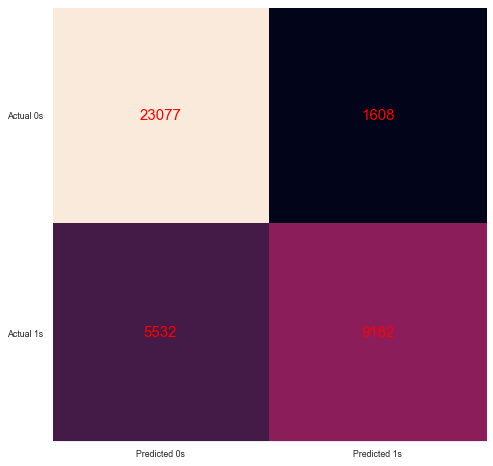

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_test[i, j], ha='center', va='center', color='red', fontsize=15)
plt.show()

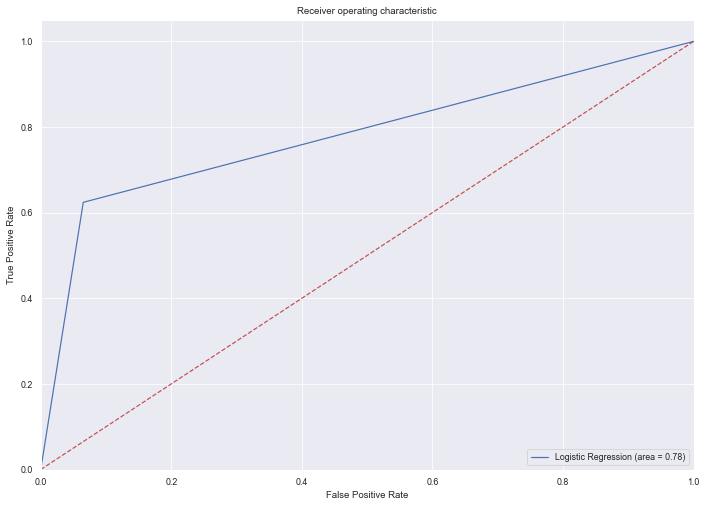

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [72]:
# Plotting the Decision Tree
dot_data = StringIO()
indep_var=X_train.columns.values
features = [u'{}'.format(c) for c in indep_var]
export_graphviz(clf, out_file=dot_data, 
                feature_names=features,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Decision Tree Assignment\\dtree5.png')



True

In [73]:
# Plotting the Decision Tree
dot_data = StringIO()
indep_var=X_train.columns.values
features = [u'{}'.format(c) for c in indep_var]
export_graphviz(clf,max_depth =1, out_file=dot_data, 
                feature_names=features,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Decision Tree Assignment\\dtree6.png")

True

In [74]:
# Custom Colorization


colors = ('green','orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
Image(graph.create_png())

graph.write_png("C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Decision Tree Assignment\\dtree7.png")


True

deposit_type_non_refund is the best variable 


Team Avenger